# Avocado Project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
    
•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


Importing Libraries

In [94]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#to view figures locally
import plotly.offline as py  
import plotly.graph_objs as go
from plotly.figure_factory import create_table

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split



from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

#To check model accuracy, errors and validations
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics

In [2]:
av_df = pd.read_csv("avocado.csv")

In [3]:
av_df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
av_df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

Exploratory Data Analysis (EDA)

In [5]:
#Checking for missing values

missing_values = av_df.isnull().sum()

missing_values

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

from the above we can see that there are no missing values in the dataset.

In [6]:
# Checking th information

av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# check the shape of the dataset

print(f"The rows and columns in the dataset: {av_df.shape}")

print(f"\n The column headers in the dataset: {av_df.columns}")


The rows and columns in the dataset: (18249, 14)

 The column headers in the dataset: Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [8]:
# Checking to see if there are duplicated rows in the dataframe

print("Total Duplicate Rows are ", av_df.duplicated().sum())

Total Duplicate Rows are  0


In [9]:
print("Min. Date :", av_df["Date"].min())

print("Max. Date :", av_df["Date"].max())

Min. Date : 2015-01-04
Max. Date : 2018-03-25


In [10]:

# Convert 'Date' to datetime type
av_df['Date'] = pd.to_datetime(av_df['Date'])


In [11]:
# Drop 'Unnamed: 0' as it seems irrelevant

av_df = av_df.drop(columns=['Unnamed: 0'])


In [12]:
av_df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [13]:
# Statistical summary

av_df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

Visualizations

In [22]:
#  AveragePrice vs. Region
 
fig = px.bar(av_df, x = 'AveragePrice', y = 'region', title='Average Price by Region')
fig.show()

In [26]:
#  AveragePrice vs. type
 
fig = px.bar(av_df, x = 'AveragePrice', y = 'type', title='Average Price by type', color_discrete_sequence=['magenta'],)
fig.show()

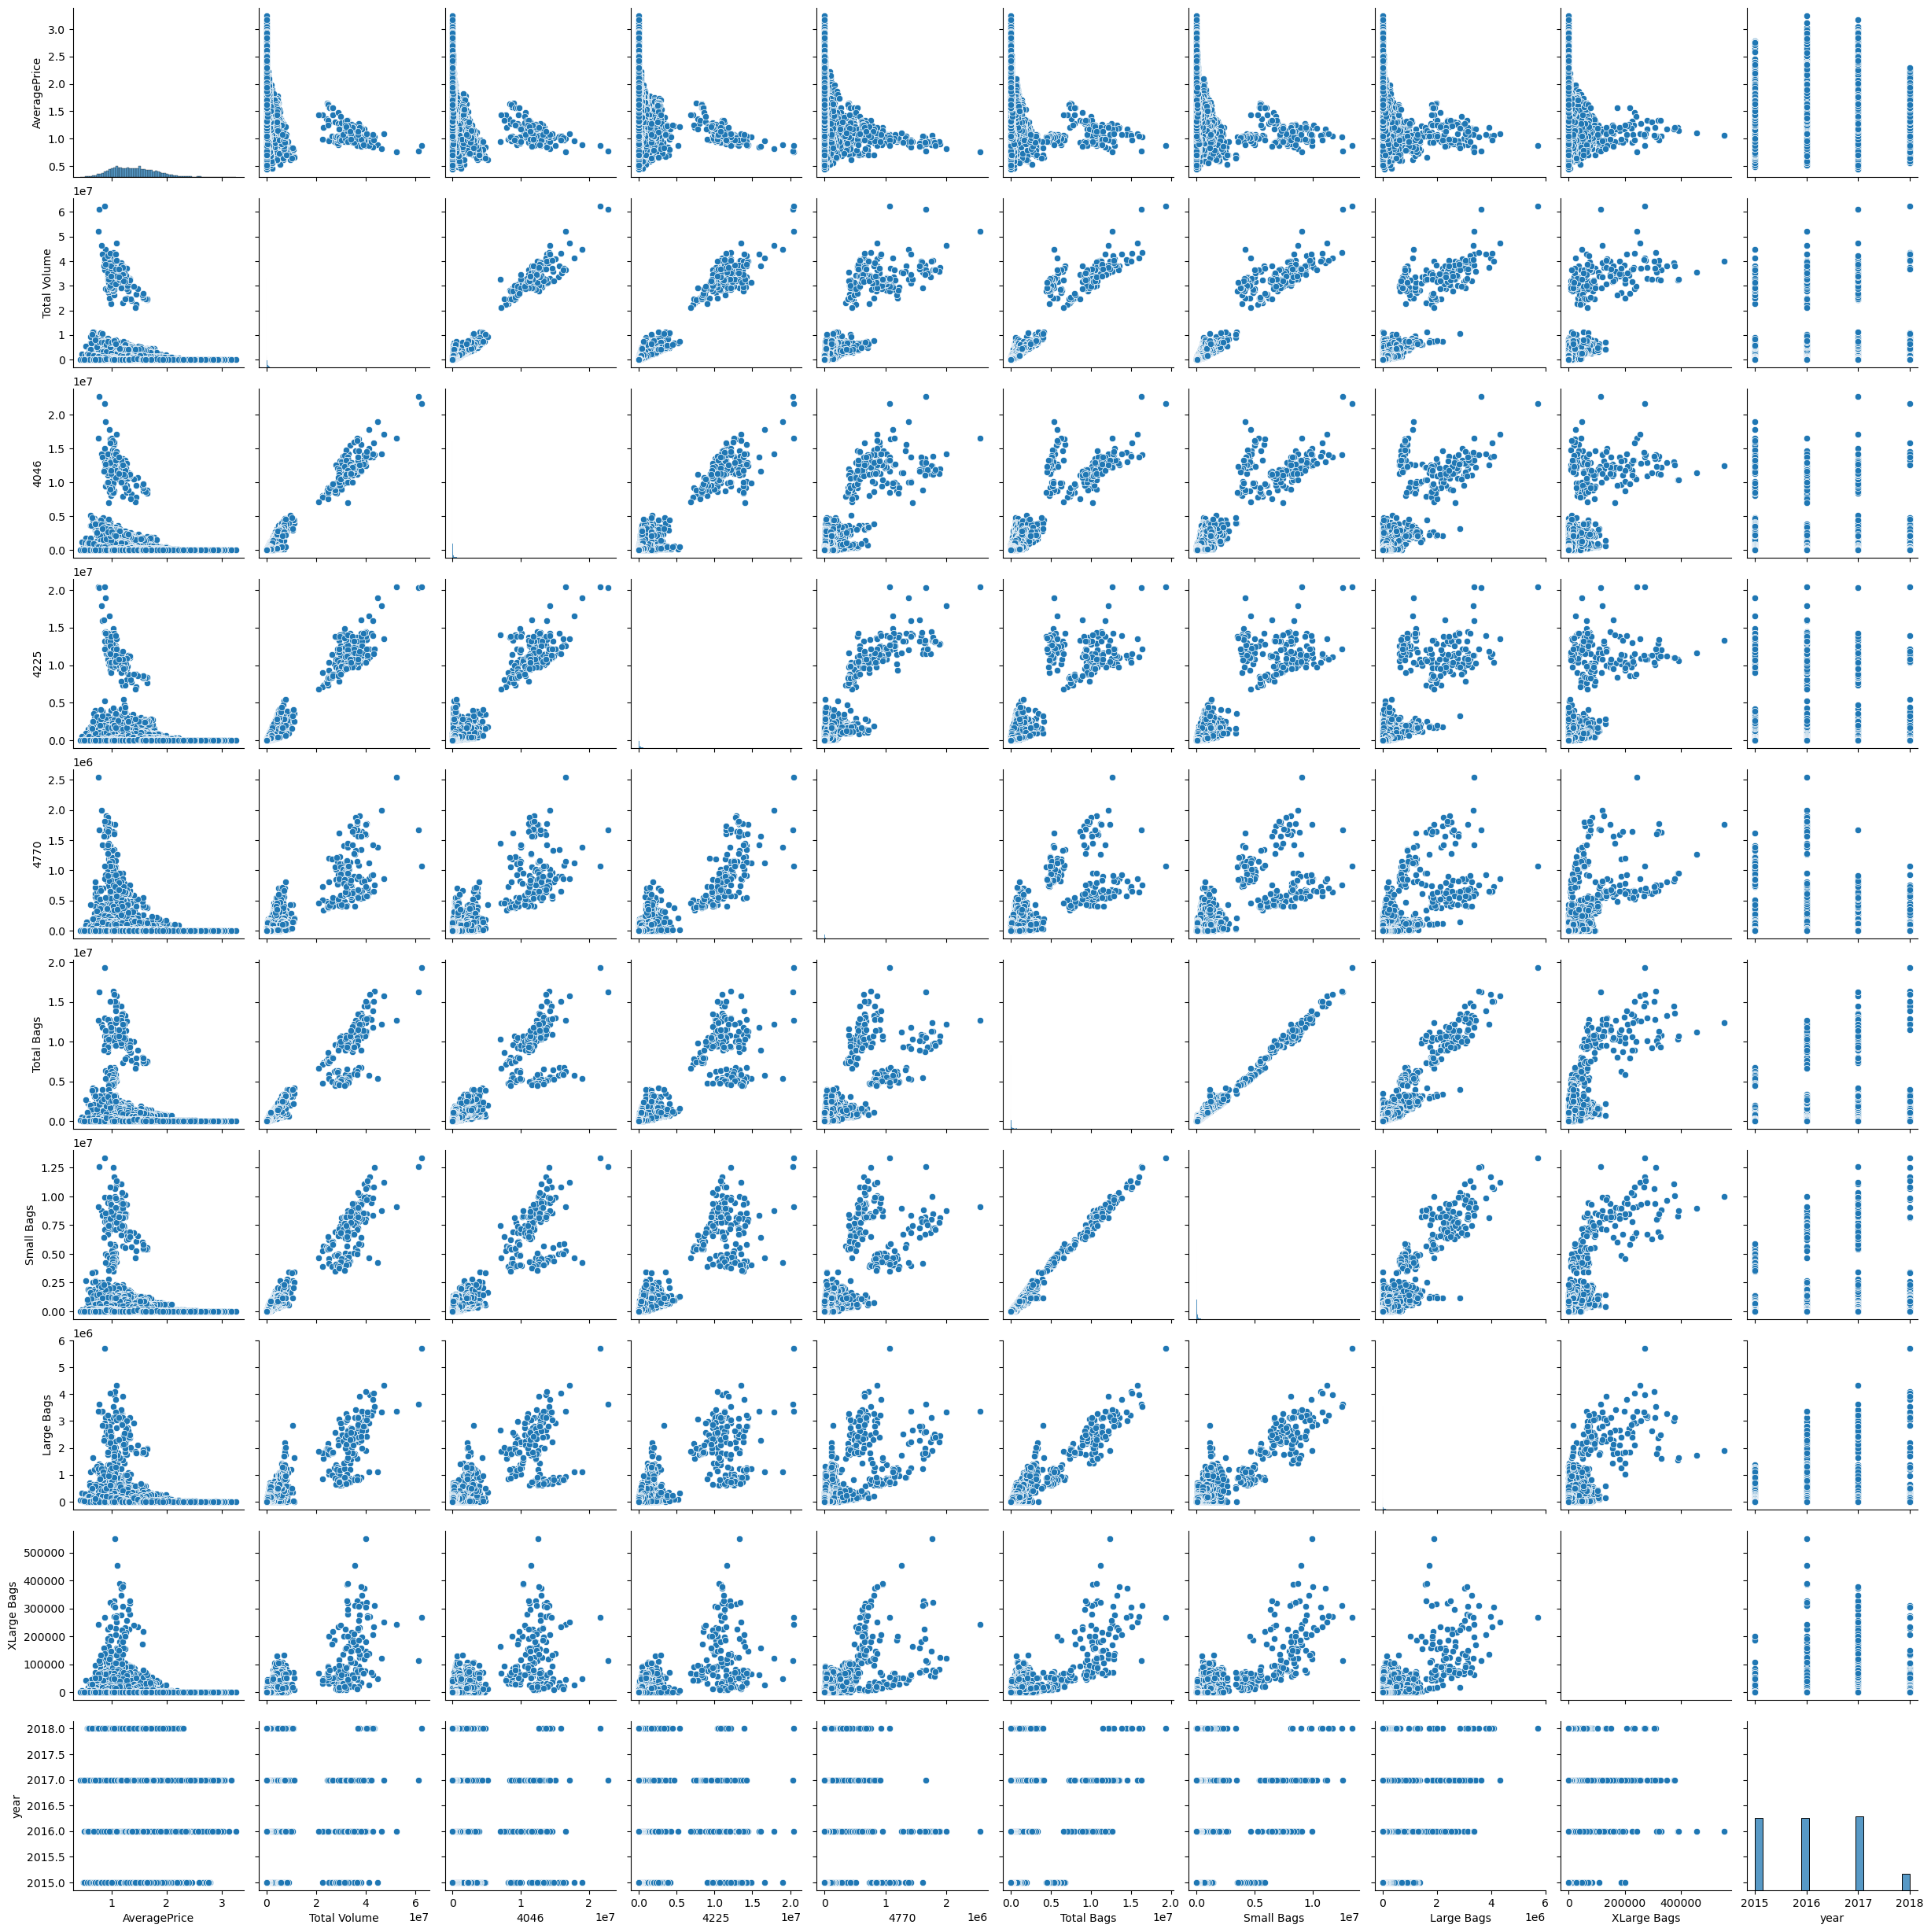

In [29]:
sns.pairplot(data=av_df)

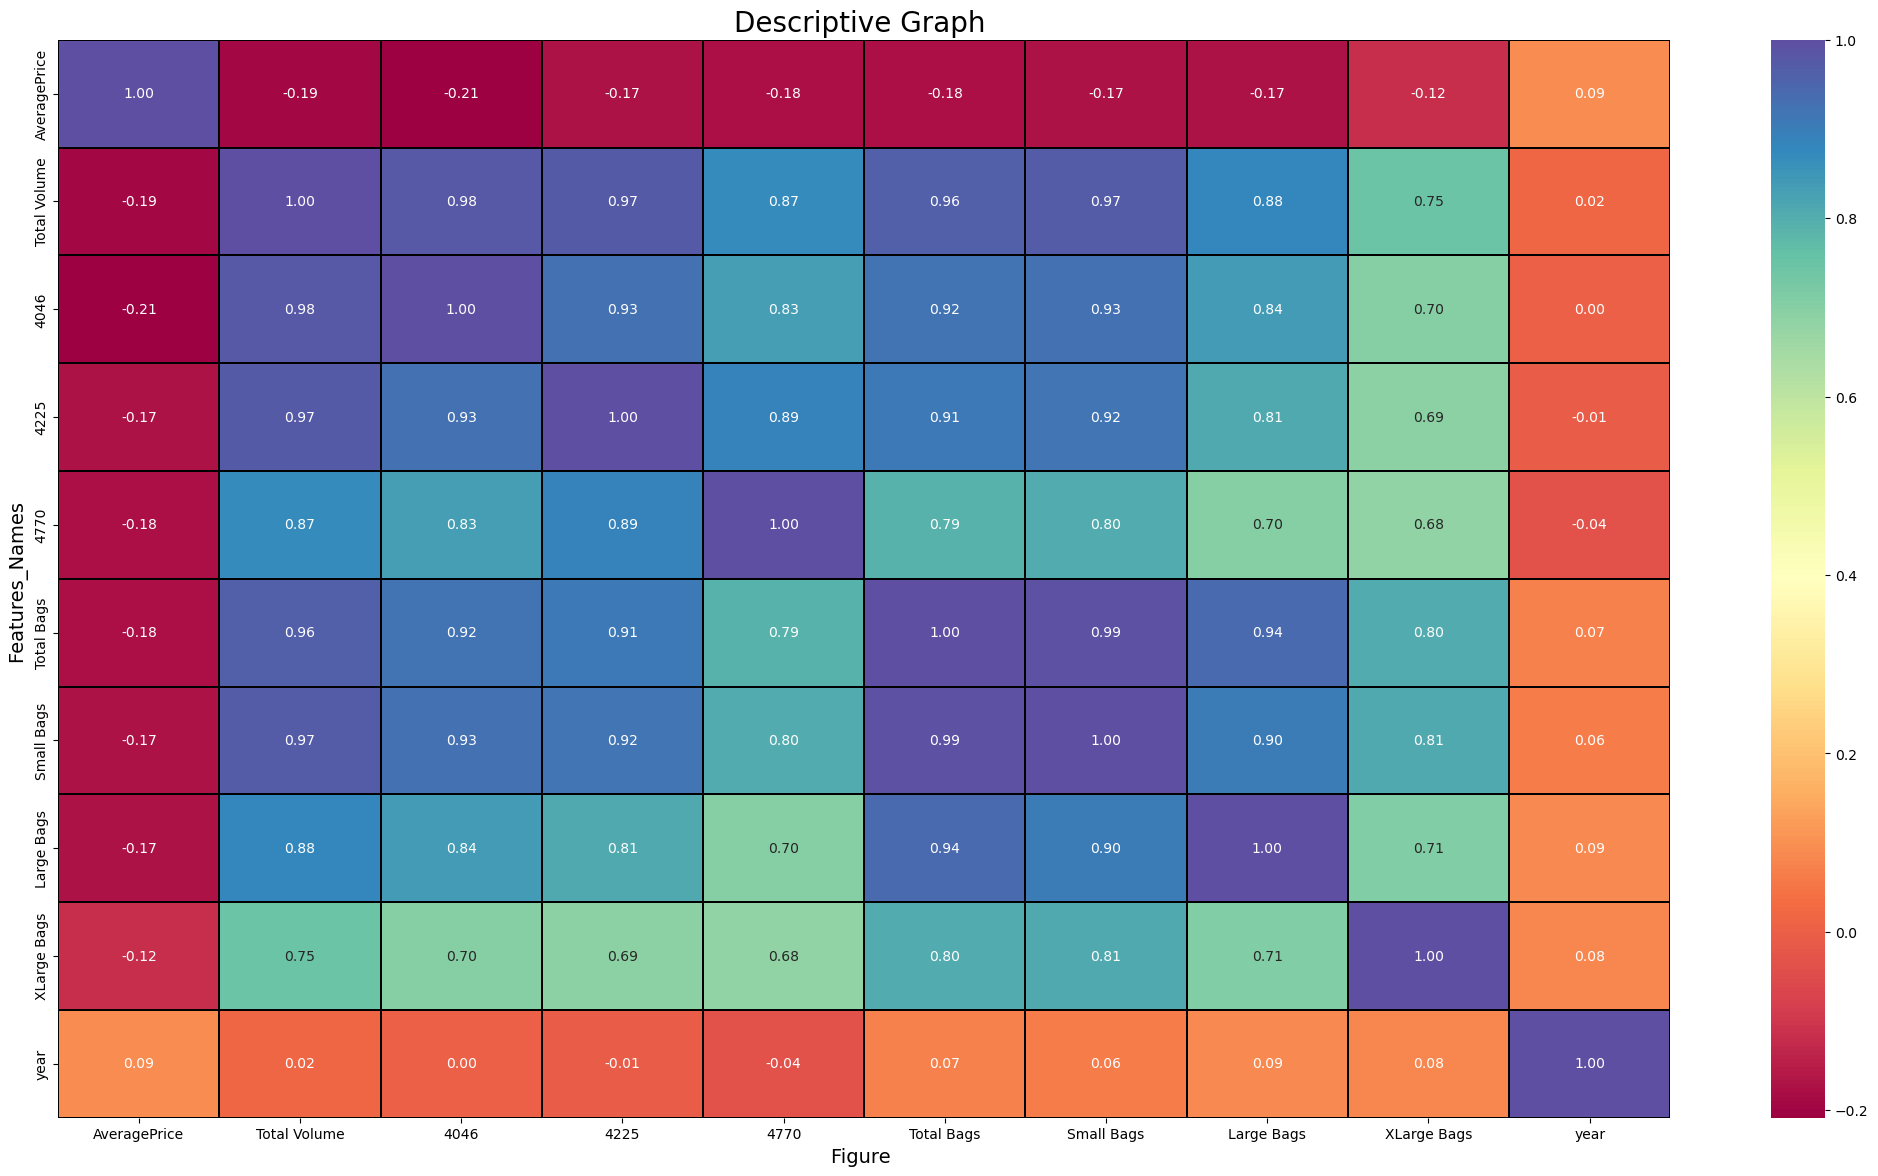

In [30]:
# Heatmap visualization

plt.figure(figsize = (26, 14))
sns.heatmap(av_df.corr(),annot = True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure ', fontsize = 14)
plt.ylabel('Features_Names ', fontsize= 14)
plt.title('Descriptive Graph ', fontsize = 20)

plt.show()

In [32]:
# checking the correlation of every feature with the target variable

av_df.corr().AveragePrice.sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
year            0.093197
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [38]:
# checking the correlation of every feature with the target variable

#av_df.corr().region.sort_values()

Text(0.5, 1.0, 'Correlation between label and features using barplot')

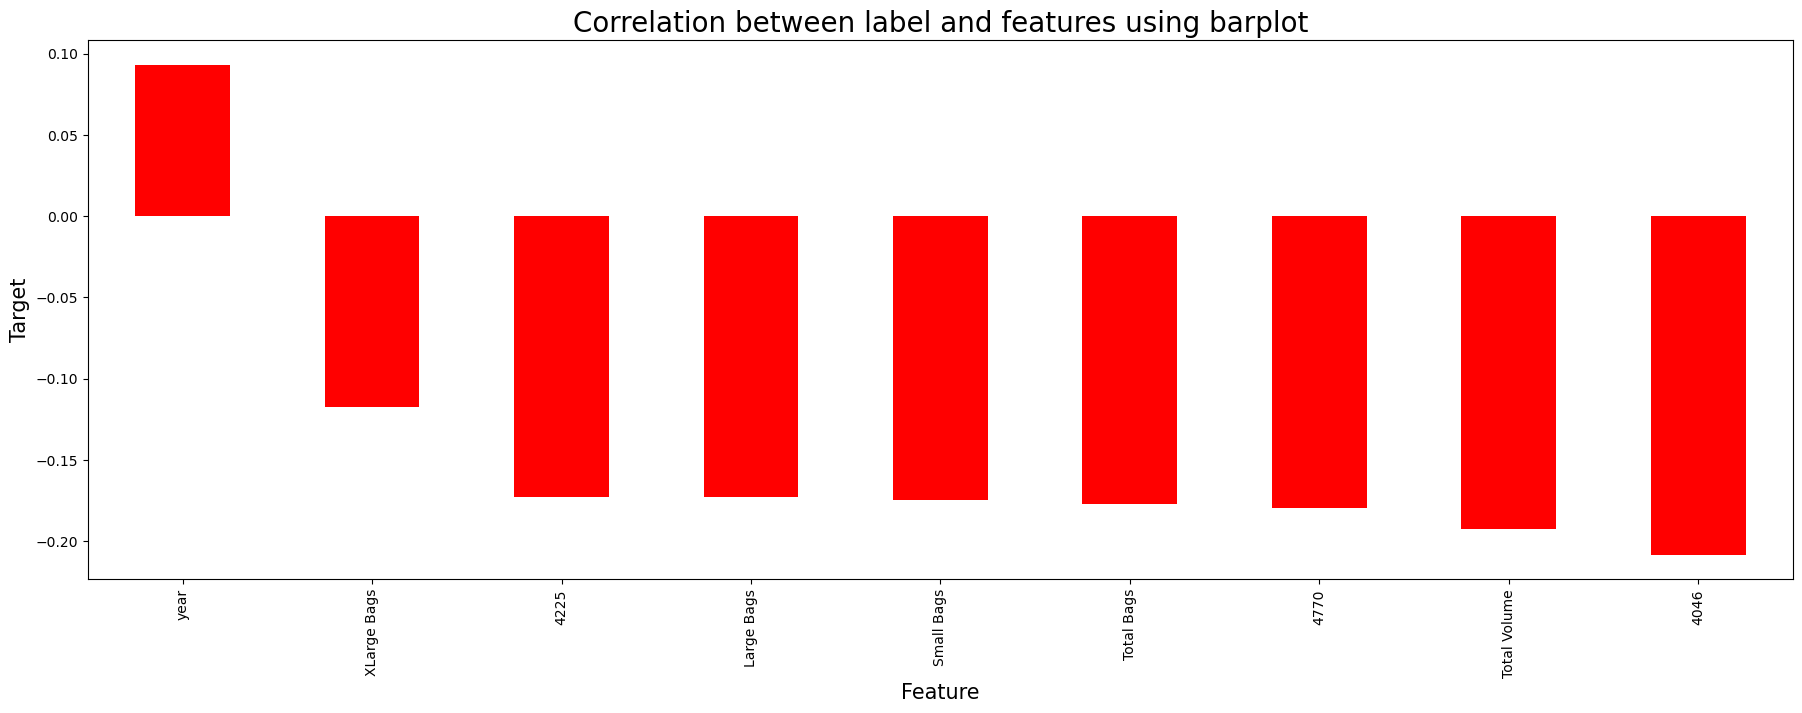

In [40]:
# Visualizing the correlation between label and feautures using bar plot

plt.figure(figsize = (22, 7))
av_df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)

In [53]:
# Encode categorical variables
label_encoder = LabelEncoder()
av_df['type'] = label_encoder.fit_transform(av_df['type'])
av_df['region'] = label_encoder.fit_transform(av_df['region'])
av_df['Date'] = label_encoder.fit_transform(av_df['Date'])

In [54]:
av_df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0    51          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1    50          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2    49          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3    48          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4    47          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0  
2     8042.21      103.14          0.0     0  2015       0  
3     5677.40      133.76          0.0     0  2015       0  
4     5986.26      197.69          0.0     0  2015       0

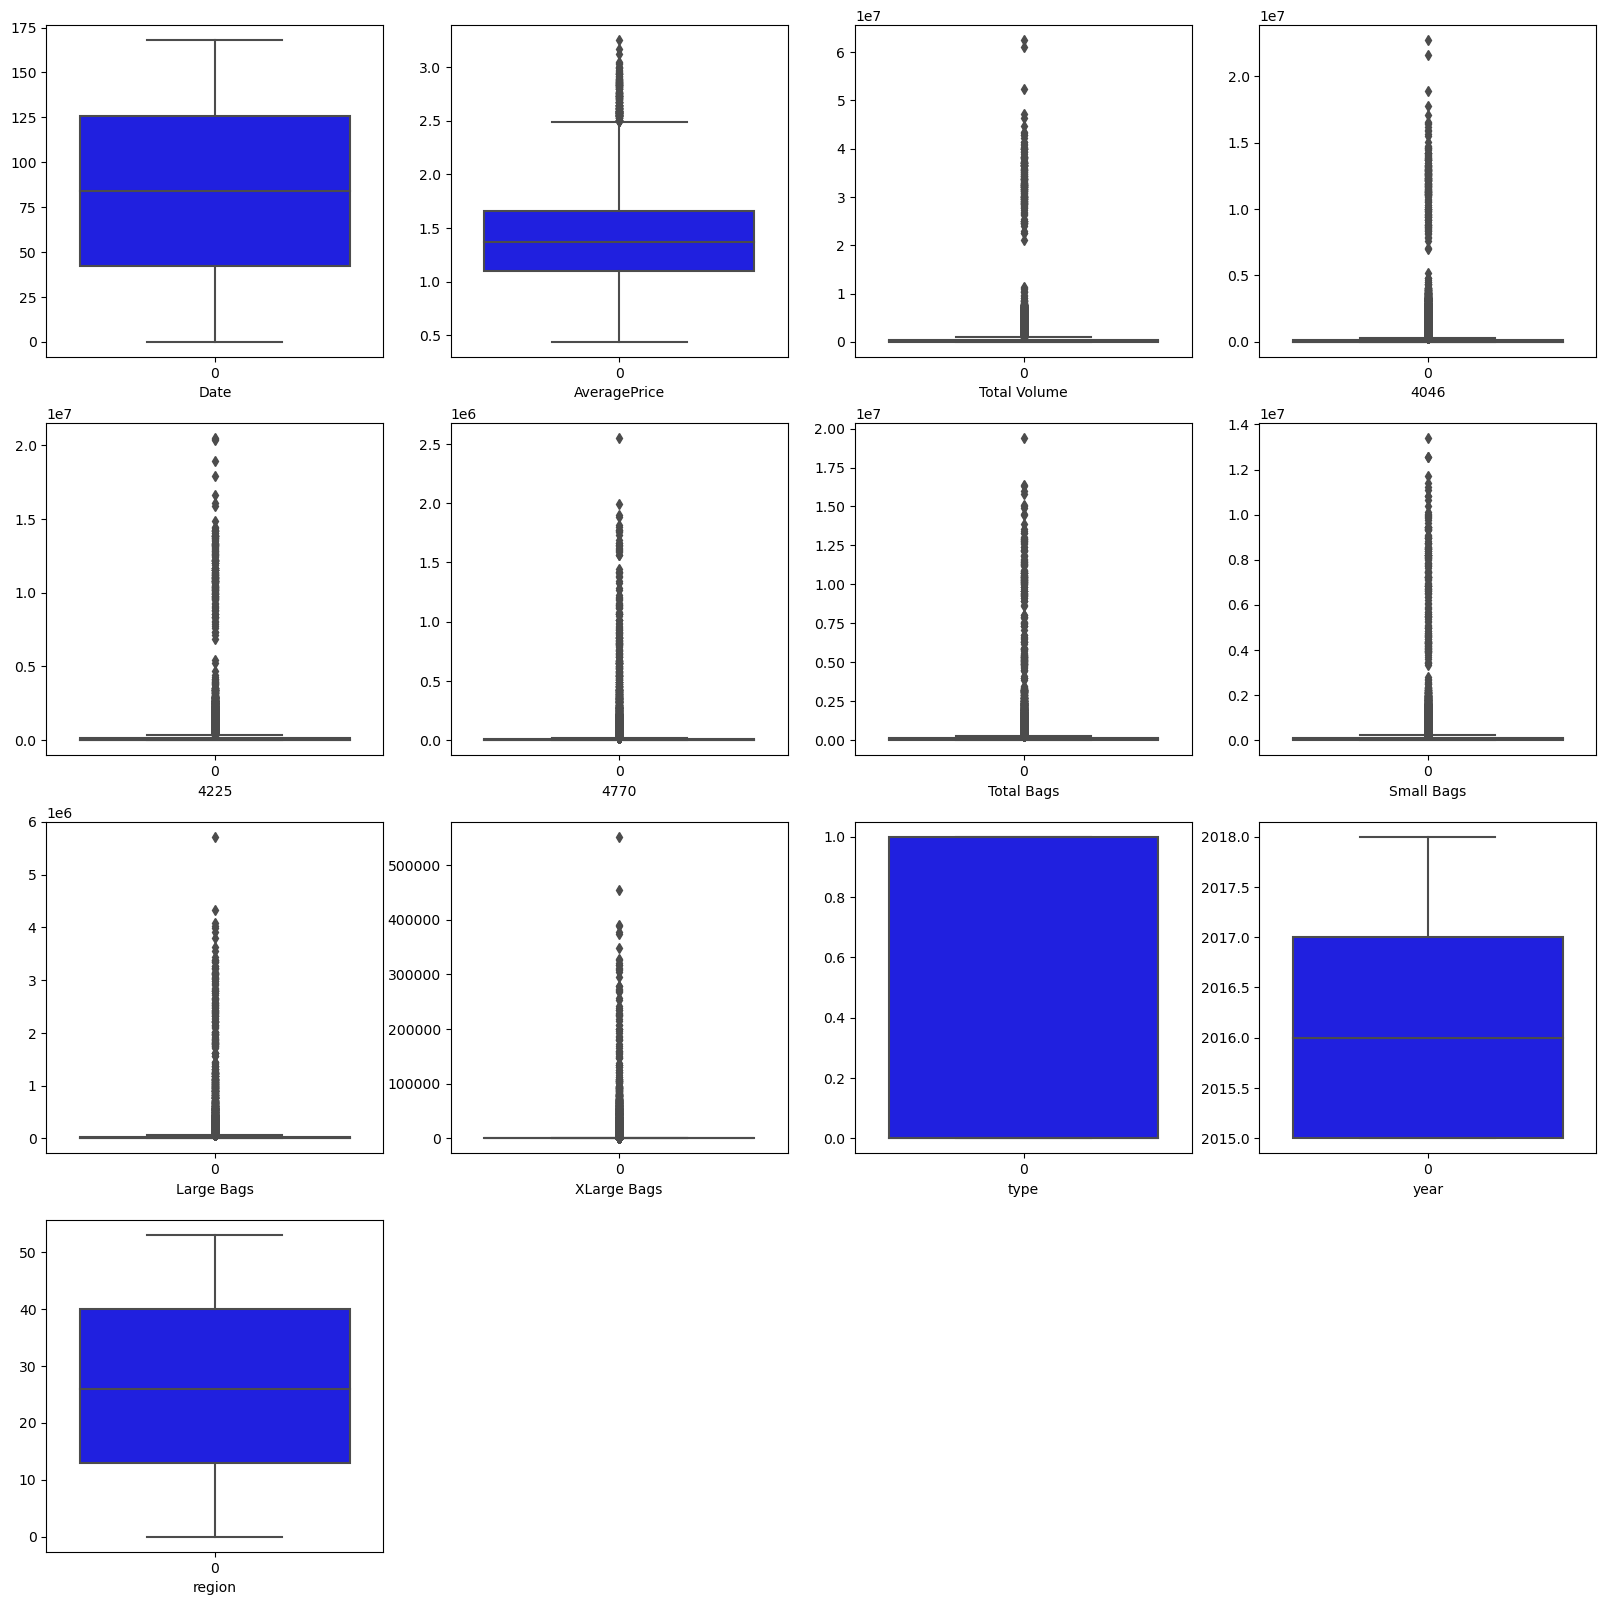

In [55]:
# lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
G = 1
for i in av_df:
    if G<=17:
        plt.subplot(5,4,G)
        sns.boxplot(av_df[i], color="blue")
        plt.xlabel(i)
    G+=1
    
plt.show()

In [ ]:
from the above, we found outlier in some columns which are 

so, removing the outliers using zscore and IQR techniques before building the model and selected best one.

Outliers is not removed from categorical columns and target column

In [56]:
from scipy.stats import zscore

out_features=av_df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z=np.abs(zscore(out_features))

z

# abs means absolute value. it converts any negatives to positive

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [57]:
# using 3 as the threshold. any value more than 3 is considered as an outlier. from the standard deviation

np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [58]:
# removing the outliers
# keeping all the columns where the z value is less than 3

av_df1 = av_df[(z<3).all(axis=1)]

av_df1.shape

(17782, 13)

In [62]:
# shape of old and new DataFrame

print("Old Data Frame - ", av_df.shape[0])

print("New Data Frame - ", av_df1.shape[0])

Old Data Frame -  18249
New Data Frame -  17782


In [64]:
# checking the data loss

print("Data Loss percentage- ", ((av_df.shape[0]-av_df1.shape[0])/av_df.shape[0])*100)

Data Loss percentage-  2.55904433119623


it is affordable loss of data

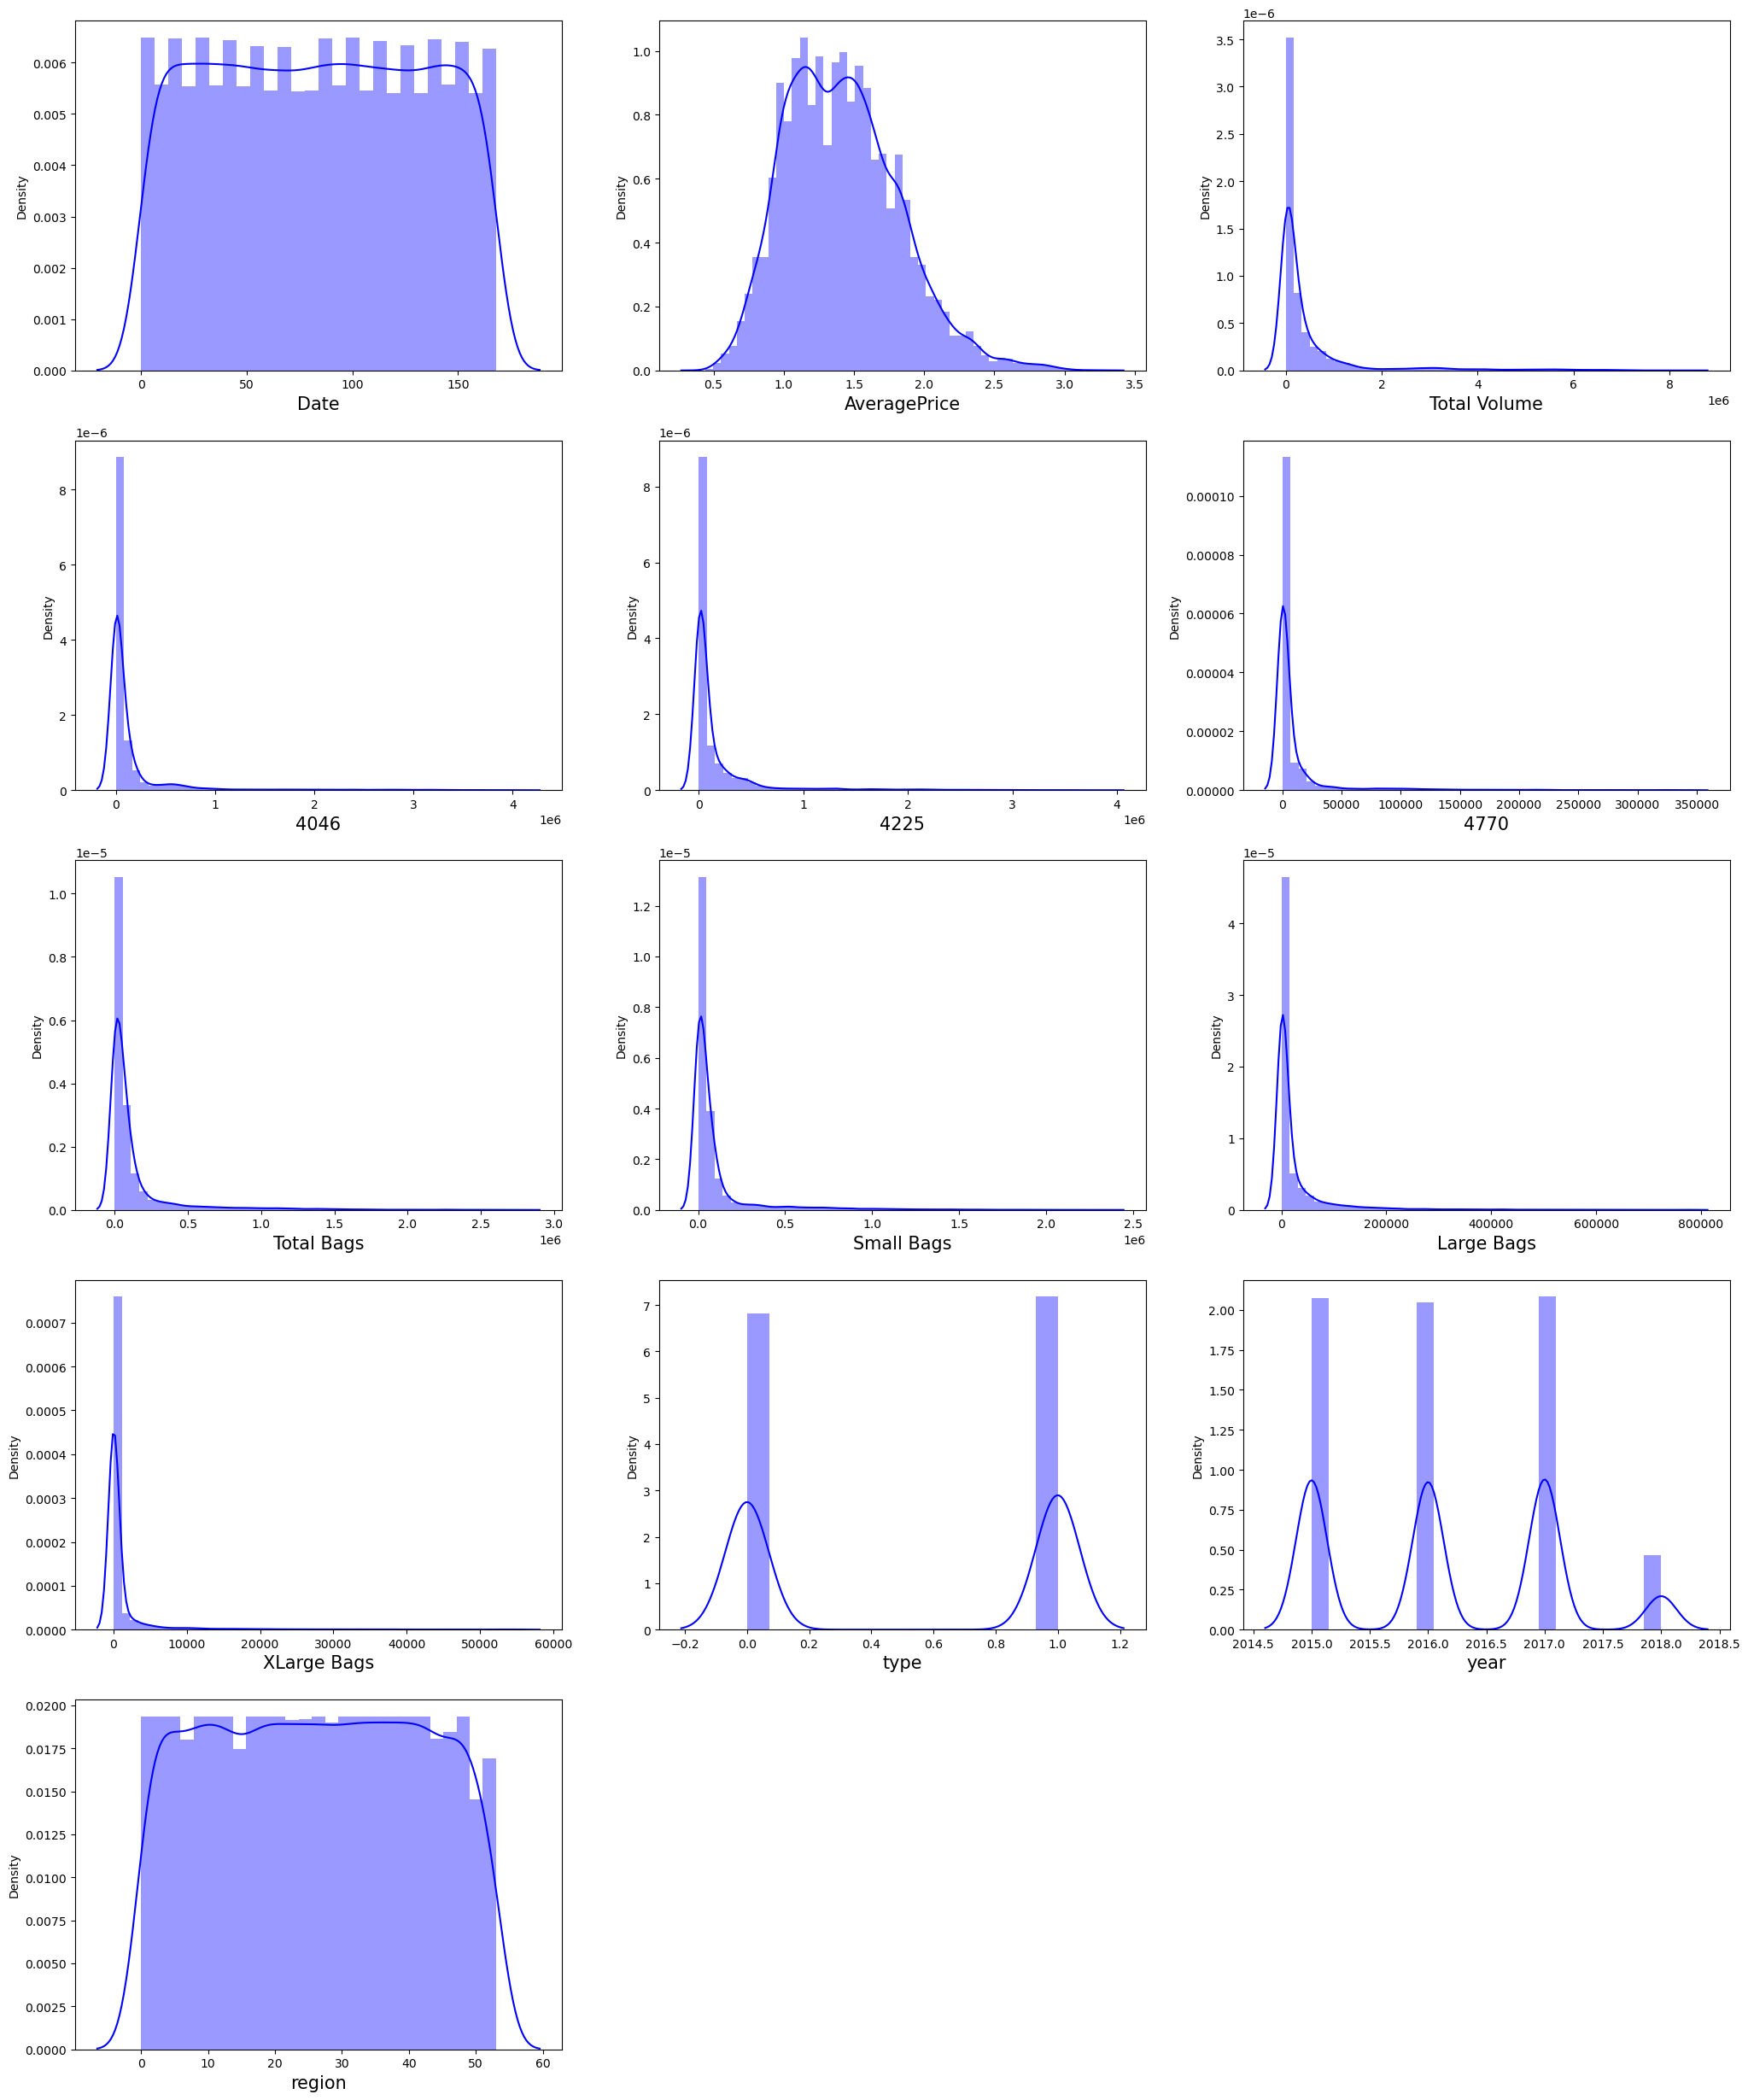

In [69]:
# univariate analysis

plt.figure(figsize = (25,50))
position = 1

for column in av_df1:
    if position <=17:
        ax = plt.subplot(8,3,position)
        sns.distplot(av_df1[column], color = 'b')
        plt.xlabel(column,fontsize=15)
        
    position +=1
plt.show()

In [70]:
# checking skewness further

av_df1.skew()

Date            0.004284
AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

In [65]:
# ideally, skewnwess is bewtween -1 and 1
# we have transform the data 

In [71]:
# Removing skewness in volume column using cuberoot method

av_df1['Total Volume'] = np.cbrt(av_df1['Total Volume'])
av_df1['4046'] = np.cbrt(av_df1['4046'])
av_df1['4225'] = np.cbrt(av_df1['4225'])
av_df1['4770'] = np.cbrt(av_df1['4770'])
av_df1['Total Bags'] = np.cbrt(av_df1['Total Bags'])
av_df1['Small Bags'] = np.cbrt(av_df1['Small Bags'])
av_df1['XLarge Bags'] = np.cbrt(av_df1['XLarge Bags'])
av_df1['Large Bags'] = np.cbrt(av_df1['Large Bags'])


In [72]:
av_df1.skew()

Date            0.004284
AveragePrice    0.560969
Total Volume    1.248634
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      1.237136
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

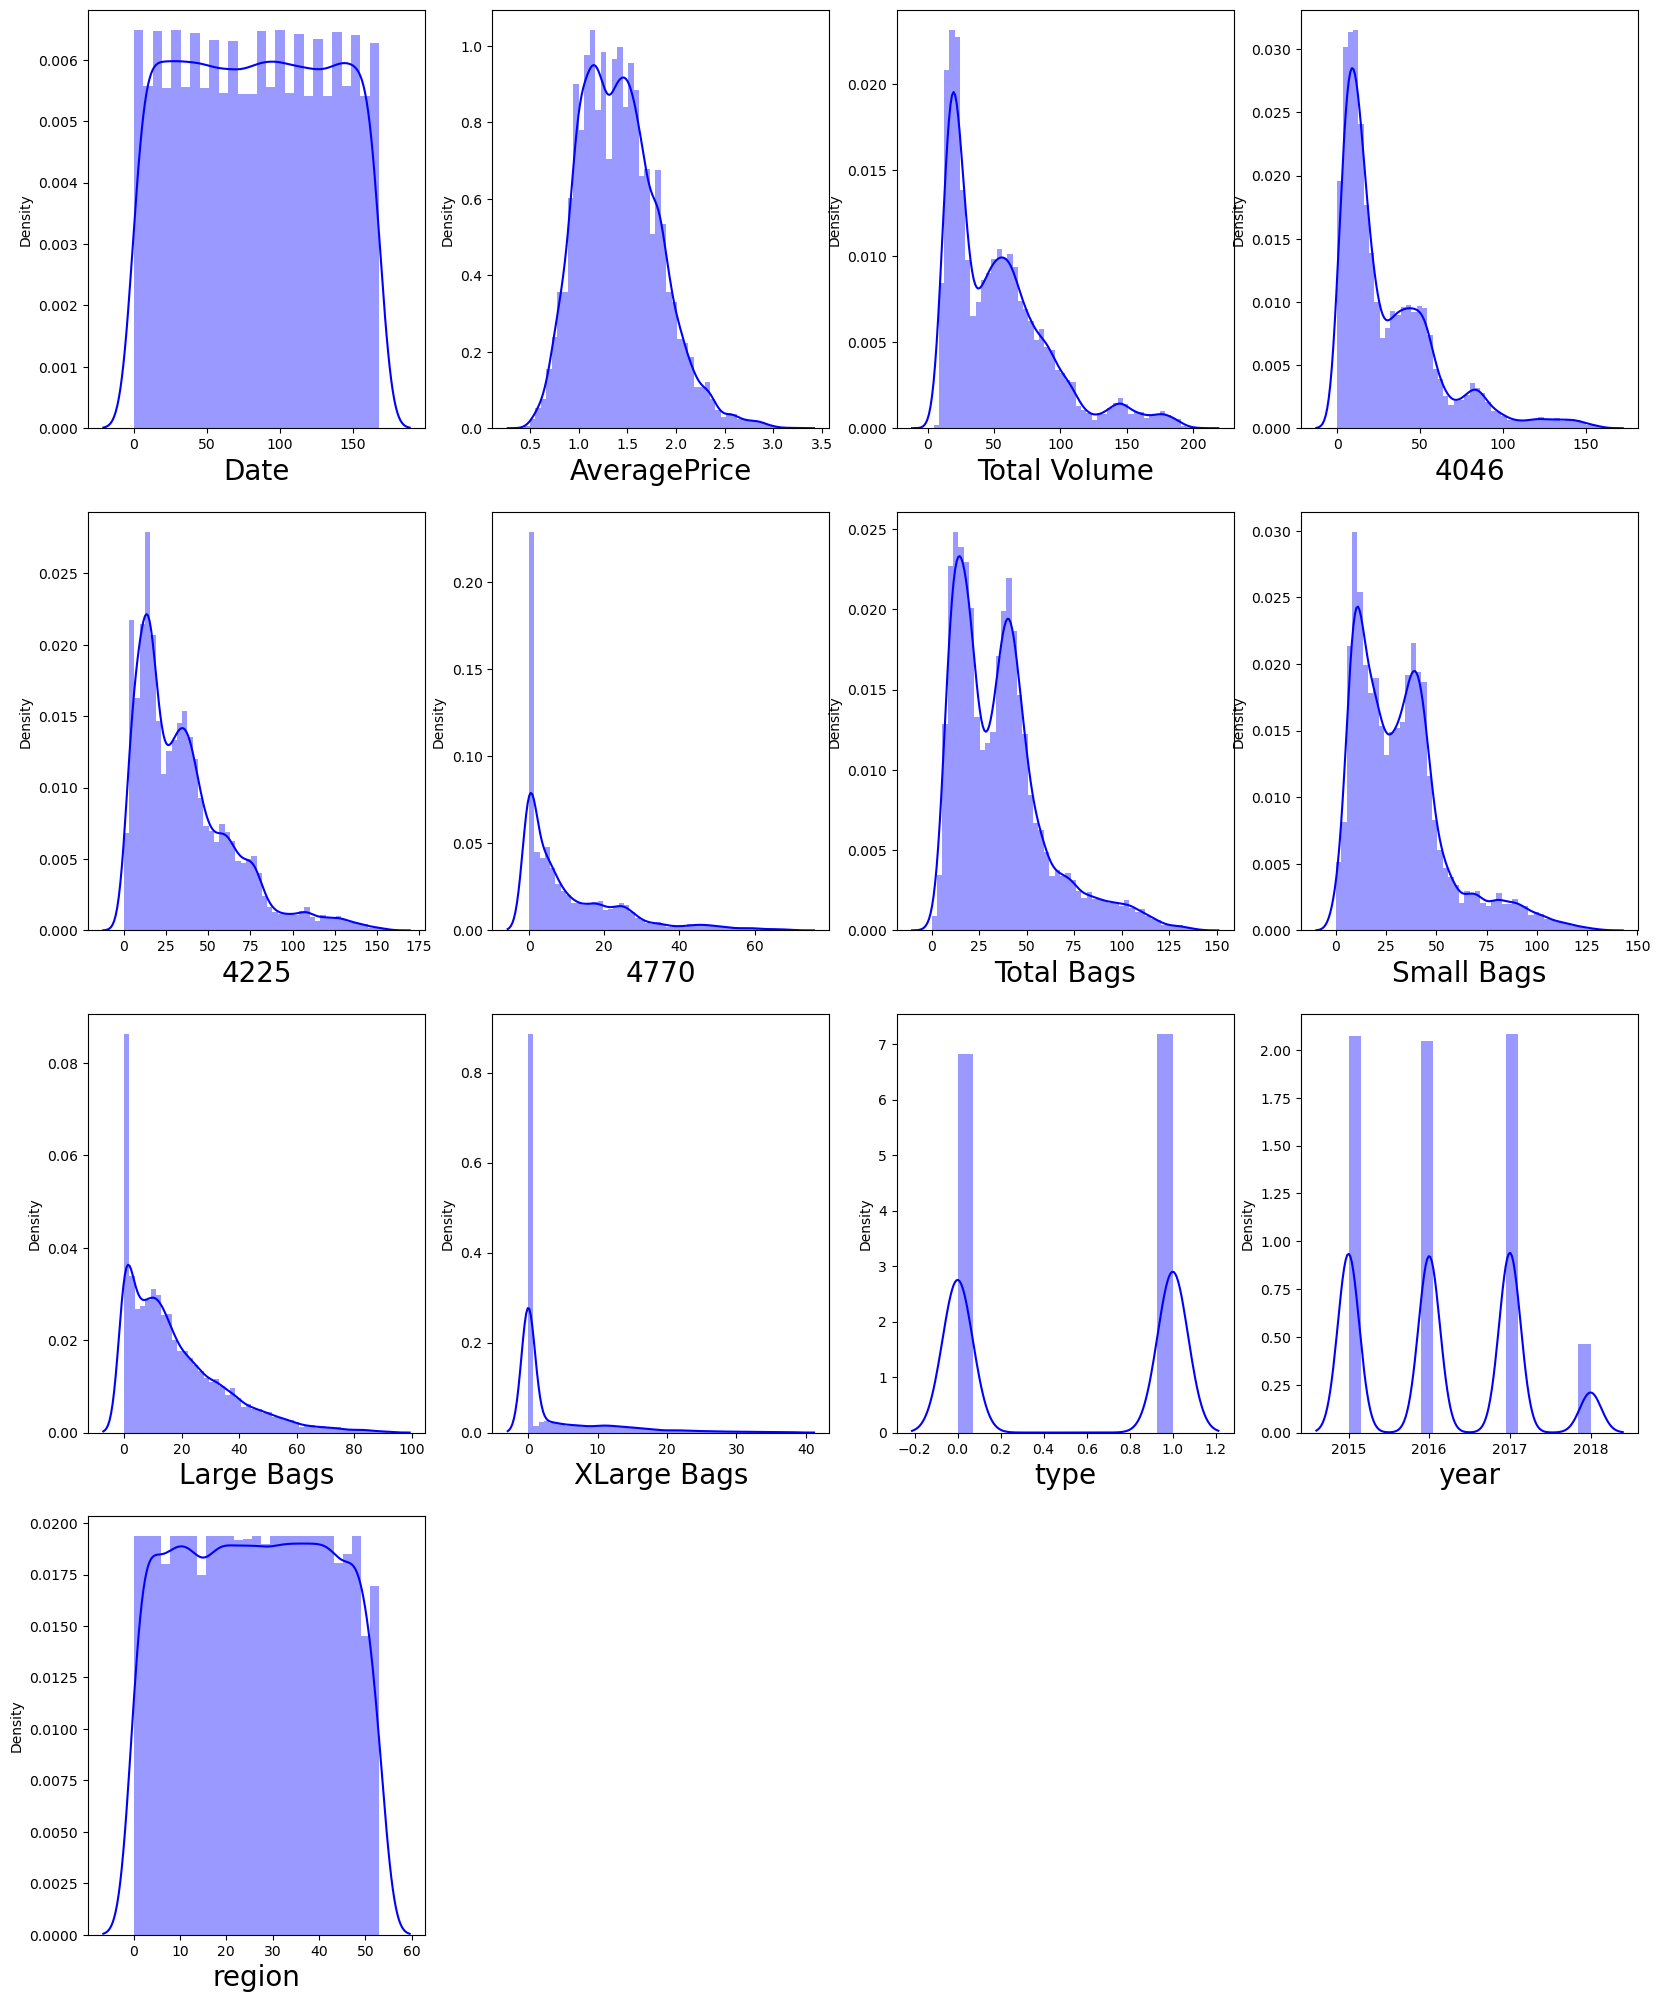

In [73]:
# Let us visualize again

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in av_df1:
    if plotnumber<=13:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(av_df1[column], color = 'blue')
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
    
plt.show()

Data Preprocessing and Feature Engineering

In [74]:
# Seperating the Independent and target variables into x and y

x = av_df1.drop("AveragePrice", axis = 1)

y = av_df1["AveragePrice"]

print("Feature shape - ", x.shape)

print("Label shape - ", y.shape)

Feature shape -  (17782, 12)
Label shape -  (17782,)


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

Date  Total Volume      4046      4225      4770  Total Bags  \
0     -0.670279     -0.354089 -0.705362  0.064883 -0.529798   -0.641895   
1     -0.690764     -0.407704 -0.750850 -0.020407 -0.511952   -0.616418   
2     -0.711250     -0.117703 -0.734240  0.411907 -0.423134   -0.660191   
3     -0.731736     -0.279279 -0.695237  0.194527 -0.490150   -0.748403   
4     -0.752221     -0.431455 -0.716127 -0.027893 -0.485656   -0.732897   
...         ...           ...       ...       ...       ...         ...   
17777  1.583139     -0.728403 -0.618694 -0.861122 -0.800418   -0.508226   
17778  1.562653     -0.773259 -0.689178 -0.736088 -0.800418   -0.623845   
17779  1.542167     -0.775096 -0.689156 -0.792146 -0.131310   -0.619841   
17780  1.521682     -0.740047 -0.658395 -0.760349 -0.131595   -0.573750   
17781  1.501196     -0.722989 -0.566385 -0.798448 -0.348330   -0.545579   

       Small Bags  Large Bags  XLarge Bags      type      year    region  
0       -0.510944   -0.793364    -0.516326 -1.026443 -1.214908 -1.698613  
1       -0.483999   -0.789373    -0.516326 -1.026443 -1.214908 -1.698613  
2       -0.530761   -0.784231    -0.516326 -1.026443 -1.214908 -1.698613  
3       -0.626226   -0.759214    -0.516326 -1.026443 -1.214908 -1.698613  
4       -0.612407   -0.717298    -0.516326 -1.026443 -1.214908 -1.698613  
...           ...         ...          ...       ...       ...       ...  
17777   -0.377777   -0.615154    -0.516326  0.974238  1.979143  1.742552  
17778   -0.499480   -0.655506    -0.516326  0.974238  1.979143  1.742552  
17779   -0.485833   -0.855252    -0.516326  0.974238  1.979143  1.742552  
17780   -0.437264   -0.843497    -0.516326  0.974238  1.979143  1.742552  
17781   -0.406771   -0.885996    -0.516326  0.974238  1.979143  1.742552  

[17782 rows x 12 columns]

In [76]:
# finding the best random state

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Maximum r2 score is ", maxAccu, " on Random_state ",maxRS)

Maximum r2 score is  0.546674386634878  on Random_state  140


In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = maxRS)

In [78]:
# Initialize the models
rf_model = RandomForestRegressor()
linear_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()
DT_model = DecisionTreeRegressor()
SGD_model = SGDRegressor()

# List of models
models = [rf_model, linear_model, gradient_boosting_model, svr_model, knn_model, DT_model, SGD_model]
model_names = ['Random Forest', 'Linear Regression', 'Gradient Boosting', 'Support Vector Machines', 'K-Nearest Neighbors', 'Decision Tree', 'SGD']

# Creating a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE', 'MSE'])

# Evaluating each model
for i, model in enumerate(models):
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_test_pred = model.predict(x_test)
    
    # Initializing Evaluation Metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)

    
    # Store results
    results_df.loc[i] = [model_names[i], rmse_test, r2_test, mae_test, mse]

# Display the results
results_df.sort_values(by='R2', ascending=False)


Model      RMSE        R2       MAE       MSE
0            Random Forest  0.131176  0.895349  0.088404  0.017207
4      K-Nearest Neighbors  0.144427  0.873139  0.099045  0.020859
2        Gradient Boosting  0.195704  0.767065  0.147116  0.038300
5            Decision Tree  0.197157  0.763593  0.125331  0.038871
3  Support Vector Machines  0.210468  0.730595  0.150490  0.044297
1        Linear Regression  0.273016  0.546674  0.212377  0.074538
6                      SGD  0.277129  0.532912  0.214114  0.076801

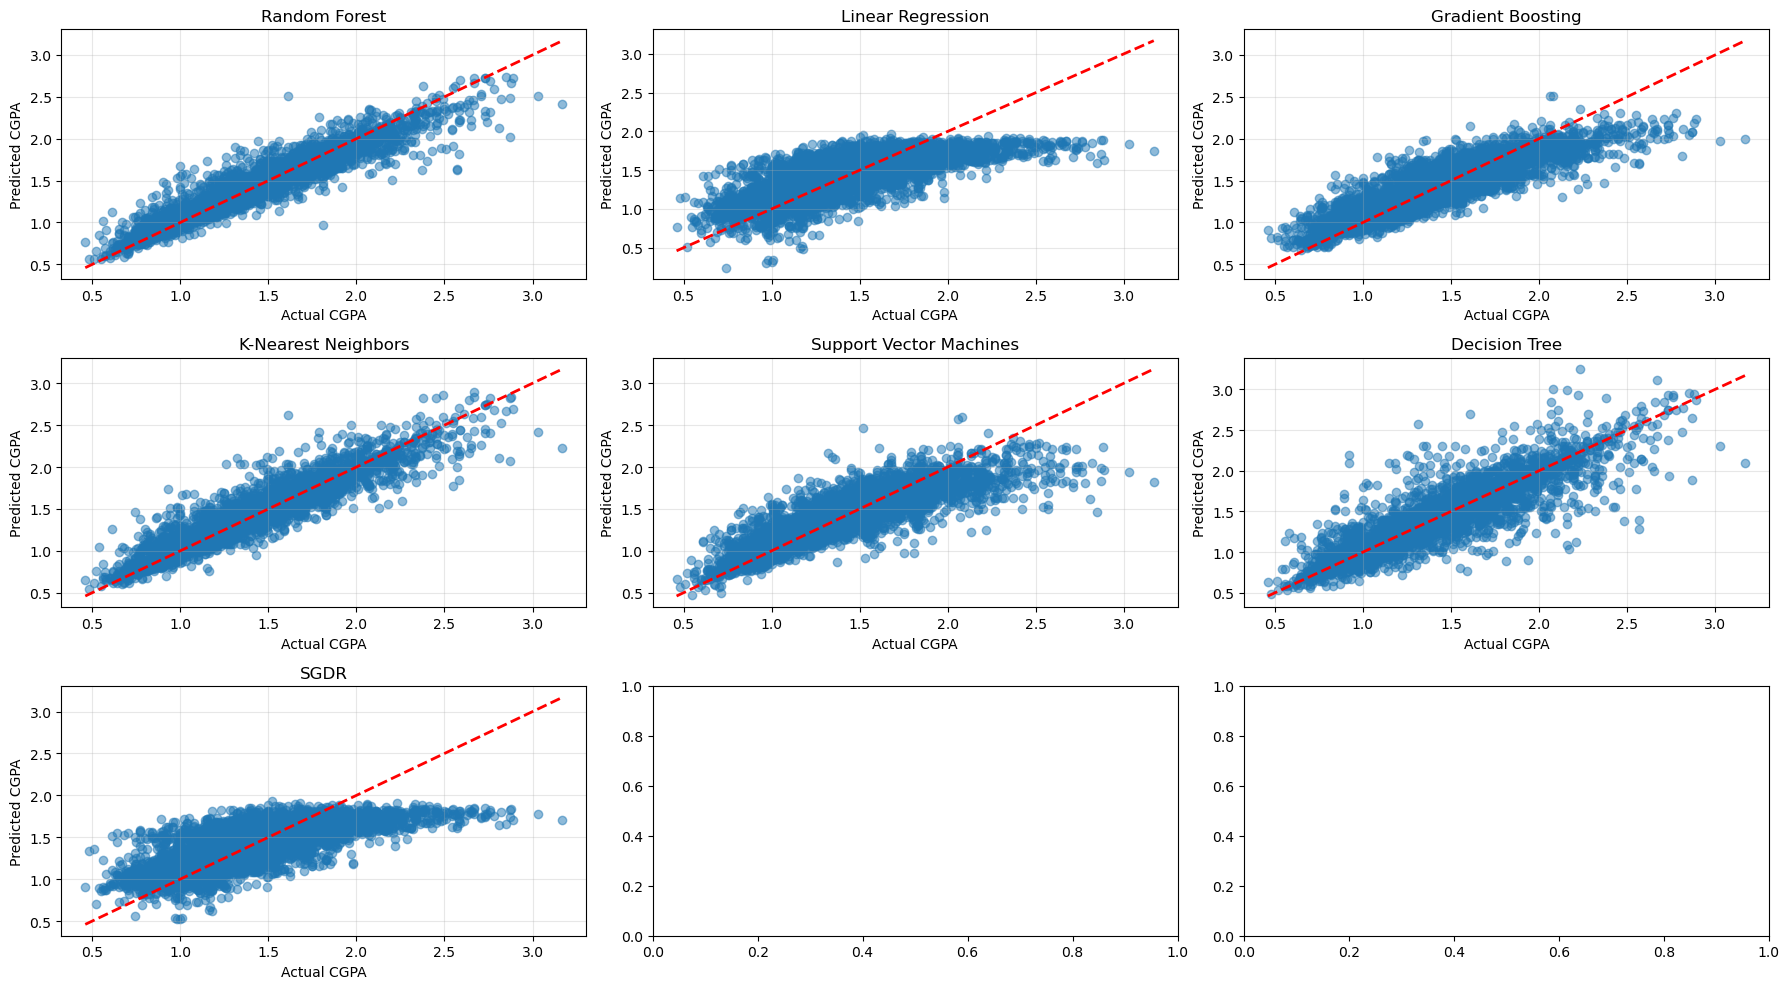

In [84]:

# Initialize models for prediction
rf_model = RandomForestRegressor().fit(x_train, y_train)
linear_model = LinearRegression().fit(x_train, y_train)
knn_model = KNeighborsRegressor().fit(x_train, y_train)
svr_model = SVR().fit(x_train, y_train)
gradient_boosting_model = GradientBoostingRegressor().fit(x_train, y_train)
DT_model = DecisionTreeRegressor().fit(x_train, y_train)
SGD_model = SGDRegressor().fit(x_train, y_train)


# Models and their names
models = [rf_model, linear_model, gradient_boosting_model, knn_model, svr_model, DT_model, SGD_model]
model_names = ["Random Forest", "Linear Regression", "Gradient Boosting", "K-Nearest Neighbors", "Support Vector Machines", "Decision Tree", "SGDR"]

# Initialize the plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# Plot each model's predictions vs. actual values
for i, (model, name) in enumerate(zip(models, model_names)):
    # Predictions
    y_pred = model.predict(x_test)
    
    # Determine the row and column for the subplot
    row = i // 3
    col = i % 3
    
    # Scatter plot
    axes[row, col].scatter(y_test, y_pred, alpha=0.5)
    axes[row, col].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=2, color='r')
    
    # Titles and labels
    axes[row, col].set_title(name)
    axes[row, col].set_xlabel("Actual CGPA")
    axes[row, col].set_ylabel("Predicted CGPA")
    axes[row, col].grid(alpha=0.3)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score, cross_validate

# Scoring parameters
scoring = ['neg_mean_squared_error', 'r2']


models = {'linear_model':LinearRegression(),
'gradient_boosting_mode': GradientBoostingRegressor(),
'svr_model': SVR(),
'knn_model': KNeighborsRegressor(),
'DT_model': DecisionTreeRegressor(),
'SGD_model': SGDRegressor(),
'SGD_model': SGDRegressor()          
}



# Perform 5-fold cross-validation and store results
cv_results = {}
for name, model in models.items():
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=5, return_train_score=True)
    
    # Calculate metrics
    train_mse = -scores['train_neg_mean_squared_error'].mean()
    train_rmse = np.sqrt(train_mse)
    train_r2 = scores['train_r2'].mean()
    test_mse = -scores['test_neg_mean_squared_error'].mean()
    test_rmse = np.sqrt(test_mse)
    test_r2 = scores['test_r2'].mean()
    
    # calculate the Standard deviation of the scores to check for overfitting/underfitting
    train_std = scores['train_r2'].std()
    test_std = scores['test_r2'].std()
    
    cv_results[name] = {
        'Train MSE': train_mse, 'Train RMSE': train_rmse, 'Train R2': train_r2, 'Train R2 Std': train_std,
        'Test MSE': test_mse, 'Test RMSE': test_rmse, 'Test R2': test_r2, 'Test R2 Std': test_std
    }

cv_results


{'linear_model': {'Train MSE': 0.07685441313014293,
  'Train RMSE': 0.2772262850635613,
  'Train R2': 0.5224914287701646,
  'Train R2 Std': 0.00194147787794952,
  'Test MSE': 0.0770142589558119,
  'Test RMSE': 0.2775144301758233,
  'Test R2': 0.5214928553787106,
  'Test R2 Std': 0.007877602632698181},
 'gradient_boosting_mode': {'Train MSE': 0.03491409040052835,
  'Train RMSE': 0.1868531252094231,
  'Train R2': 0.7830485769858295,
  'Train R2 Std': 0.003275742734575612,
  'Test MSE': 0.03791843146554759,
  'Test RMSE': 0.1947265556249265,
  'Test R2': 0.7642817248591282,
  'Test R2 Std': 0.005975635489402888},
 'svr_model': {'Train MSE': 0.040813970632987015,
  'Train RMSE': 0.2020246782771526,
  'Train R2': 0.7463984947071788,
  'Train R2 Std': 0.002476950327438581,
  'Test MSE': 0.042700867443795885,
  'Test RMSE': 0.2066418821144346,
  'Test R2': 0.7345141784586838,
  'Test R2 Std': 0.006933236879444039},
 'knn_model': {'Train MSE': 0.013026455641378784,
  'Train RMSE': 0.1141334992

In [88]:
# finding the best random state

# Seperating the Independent and target variables into x and y

X = av_df1.drop("region", axis = 1)

Y = av_df1["region"]

print("Feature shape - ", X.shape)

print("Label shape - ", Y.shape)



Feature shape -  (17782, 12)
Label shape -  (17782,)
Maximum r2 score is  0  on Random_state  0


In [103]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


# Initialize the classification models
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
logistic_classifier = LogisticRegression(max_iter=10000, random_state=42)
svm_classifier = SVC(random_state=42)
adaboost_classifier = AdaBoostClassifier(random_state=42)
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

# Creating a DataFrame to store classification results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluating each model
for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, Y_train)
    Y_test_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_pred)
    precision = precision_score(Y_test, Y_test_pred, average='micro')
    recall = recall_score(Y_test, Y_test_pred, average='macro')
    f1 = f1_score(Y_test, Y_test_pred, average='macro')  # Specifying the 'average' parameter for f1_score
    results_df.loc[i] = [classifier_names[i], accuracy, precision, recall, f1]

# Display the classification results
print(results_df.sort_values(by='Accuracy', ascending=False))


                     Model  Accuracy  Precision    Recall  F1-Score
1            Random Forest  0.905758   0.905758  0.907129  0.906494
6        Gradient Boosting  0.831309   0.831309  0.834734  0.833758
0      K-Nearest Neighbors  0.822087   0.822087  0.826125  0.824932
2            Decision Tree  0.795322   0.795322  0.798461  0.797920
4  Support Vector Machines  0.724471   0.724471  0.732662  0.730083
3      Logistic Regression  0.539136   0.539136  0.549669  0.538378
5                 AdaBoost  0.048358   0.048358  0.058924  0.010366


In [104]:
# Creating a DataFrame to store classification results
class_results_df = pd.DataFrame(columns=['Model', 'Cross-Val Mean Accuracy', 'Cross-Val Std Deviation'])

# Evaluating each model using cross-validation
for i, classifier in enumerate(classifiers):
    cross_val_scores = cross_val_score(classifier, X_class, y_class, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_score = np.mean(cross_val_scores)
    std_dev = np.std(cross_val_scores)
    class_results_df.loc[i] = [classifier_names[i], mean_score, std_dev]

# Display the classification results
print(class_results_df.sort_values(by='Cross-Val Mean Accuracy', ascending=False))

NameError: name 'X_class' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Creating a DataFrame to store classification results
class_results_df = pd.DataFrame(columns=['Model', 'Cross-Val Mean Accuracy', 'Cross-Val Std Deviation'])

# Evaluating each model using cross-validation
for i, classifier in enumerate(classifiers):
    cross_val_scores = cross_val_score(classifier, X, Y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_score = np.mean(cross_val_scores)
    std_dev = np.std(cross_val_scores)
    class_results_df.loc[i] = [classifier_names[i], mean_score, std_dev]

# Display the classification results
print(class_results_df.sort_values(by='Cross-Val Mean Accuracy', ascending=False))


In [ ]:
import joblib

# save the model as object file

joblib.dump(rf_classifier, 'rf.obj')

#load the model from the file

rf_from_joblib=joblib.load('rf.obj')

#use the loaded model to make prediction

rf_from_joblib.predict(x_test)